In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

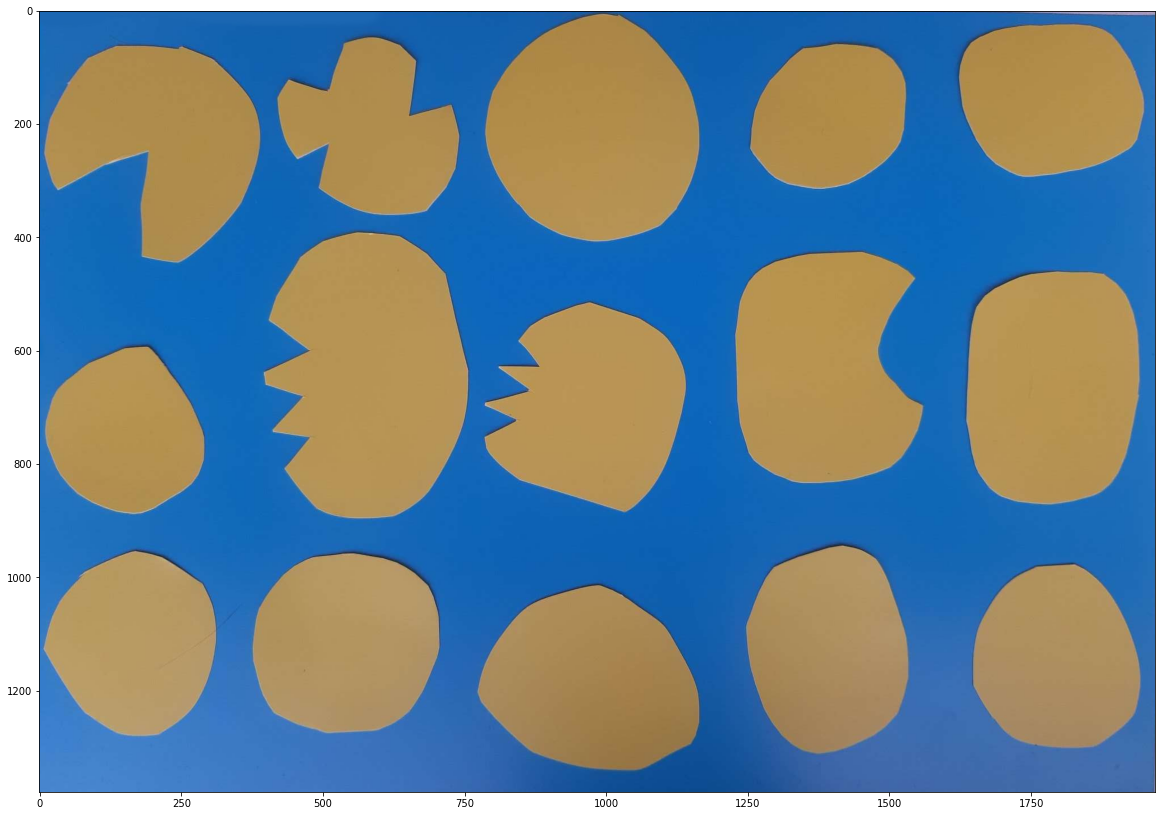

In [2]:
potata_img = cv2.imread('./potata_easy1.jpeg')
potata_img = cv2.transpose(potata_img)

potata_img = cv2.cvtColor(potata_img, cv2.COLOR_BGR2RGB)[51:-100, 20:-50]

img = potata_img.copy()

plt.figure(figsize = (20,40))
plt.imshow(np.array(potata_img)) 

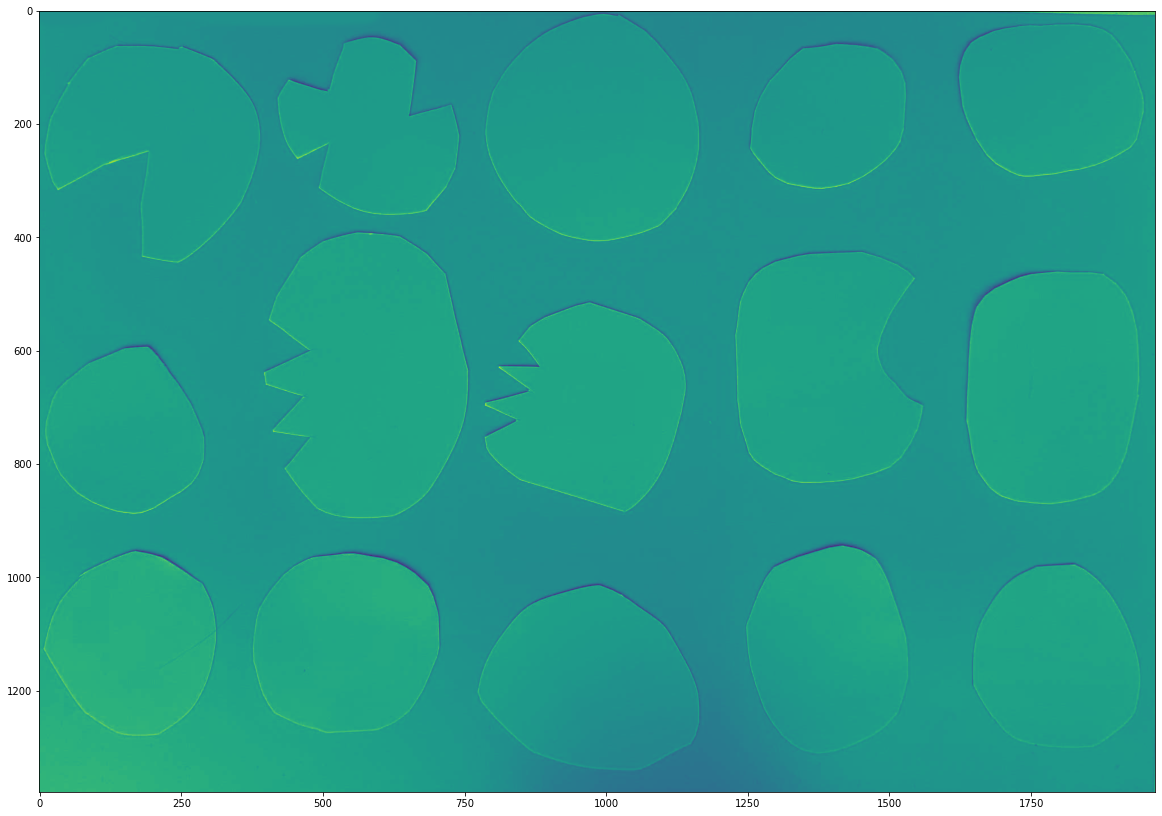

In [3]:
graypic = cv2.cvtColor(potata_img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (20,40))
plt.imshow(np.array(graypic)) 

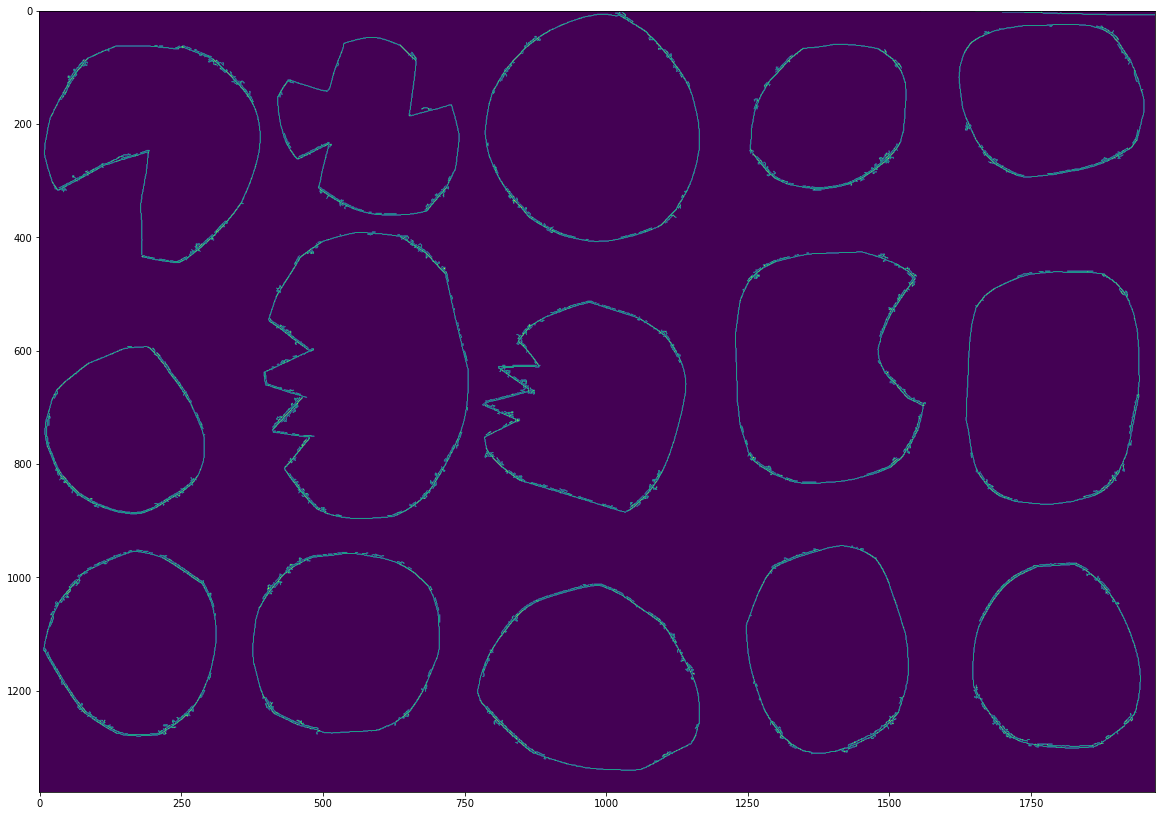

In [4]:
canny = cv2.Canny(graypic, 20, 200)

plt.figure(figsize = (20,40))
plt.imshow(np.array(canny)) 

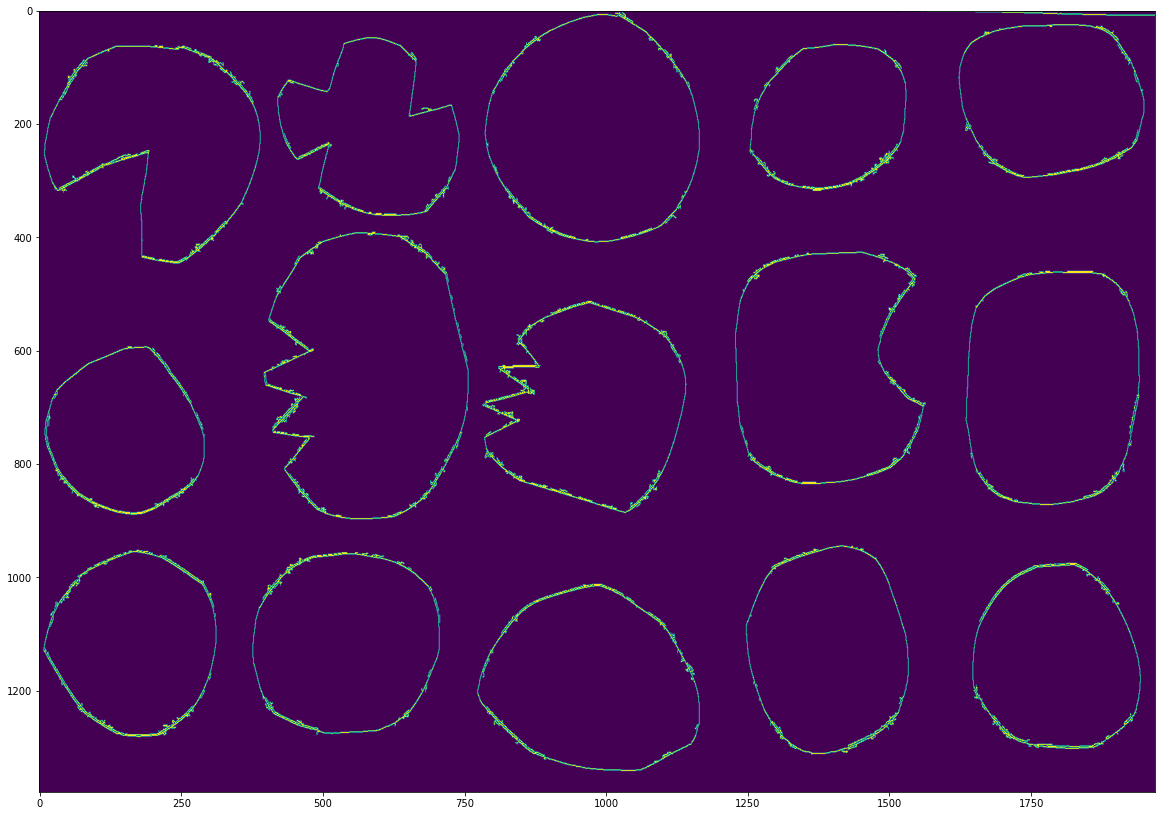

In [5]:
dil = cv2.dilate(canny,(17,17),iterations = 1)

plt.figure(figsize = (20,40))
plt.imshow(np.array(dil))

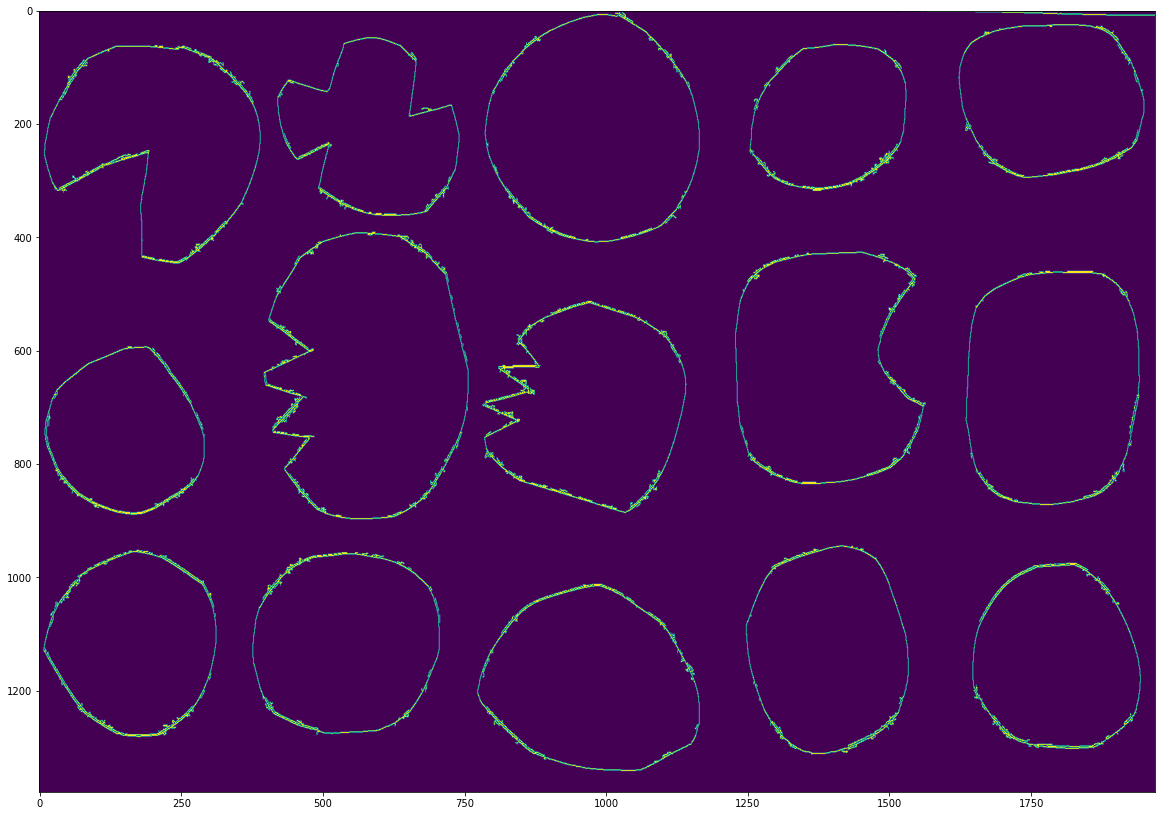

In [6]:
ret, thresh = cv2.threshold(dil, 127, 255, 0)

plt.figure(figsize = (20,40))
plt.imshow(np.array(thresh))

In [7]:
#ret, thresh = cv2.threshold(dog, 127, 255, 0)
contours_new, hierarchy = cv2.findContours(
    thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE
)

In [8]:
len(hierarchy)

1

In [9]:
contours = []
for contour in contours_new:
    if len(contour)>200:
        cv2.drawContours(potata_img, contour, -1, (0,255,0), 2)
        contours.append(contour)

In [10]:
len(contours)

30

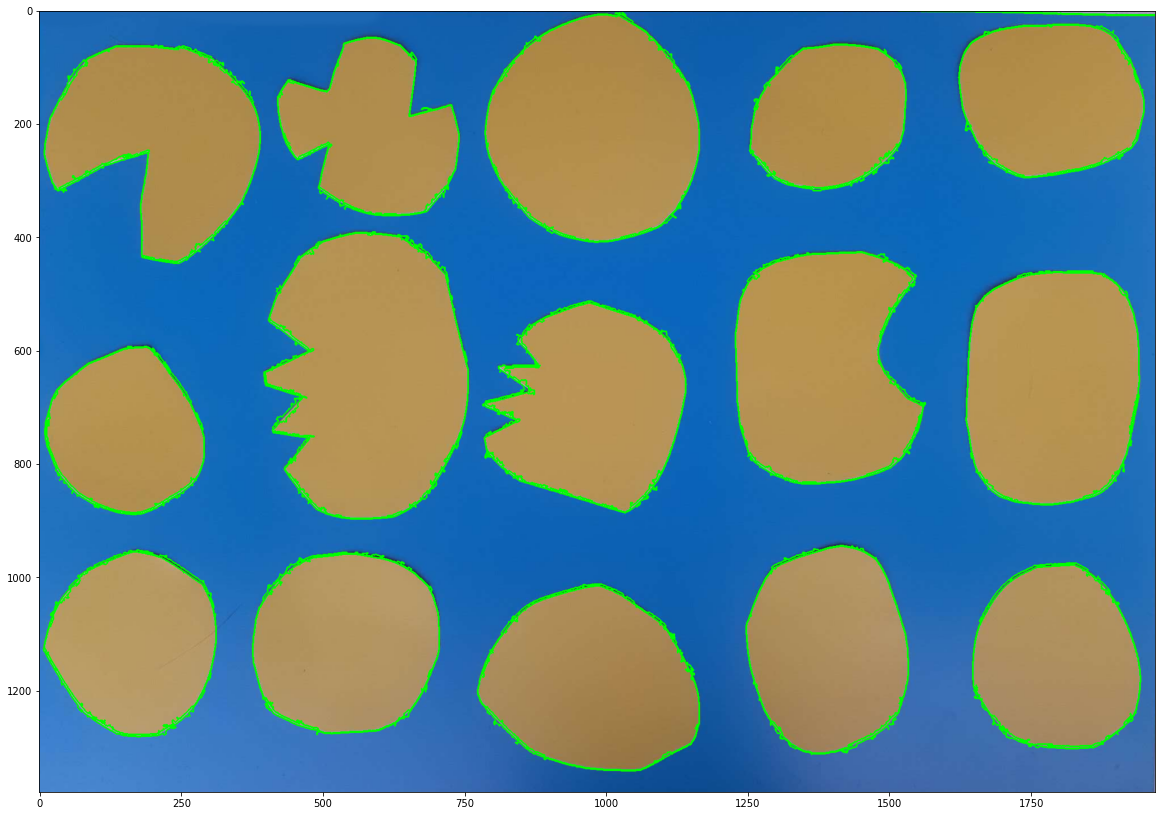

In [11]:
plt.figure(figsize = (20,40))
plt.imshow(np.array(potata_img))

In [12]:
hulls = [cv2.convexHull(contour) for contour in contours]
cv2.drawContours(potata_img, hulls, -1, (255,0,0), 2)

array([[[ 27, 103, 179],
        [ 27, 103, 179],
        [ 27, 103, 179],
        ...,
        [172, 153, 181],
        [172, 152, 180],
        [176, 151, 180]],

       [[ 27, 103, 179],
        [ 27, 103, 179],
        [ 27, 103, 179],
        ...,
        [173, 153, 180],
        [174, 151, 179],
        [176, 151, 180]],

       [[ 27, 103, 179],
        [ 27, 103, 179],
        [ 27, 103, 179],
        ...,
        [172, 154, 180],
        [173, 153, 181],
        [176, 153, 182]],

       ...,

       [[ 71, 133, 206],
        [ 71, 133, 206],
        [ 71, 133, 206],
        ...,
        [ 71,  93, 142],
        [103, 116, 161],
        [126, 131, 173]],

       [[ 71, 133, 206],
        [ 71, 133, 206],
        [ 71, 133, 206],
        ...,
        [ 71,  93, 142],
        [103, 116, 161],
        [126, 131, 173]],

       [[ 71, 133, 206],
        [ 71, 133, 206],
        [ 71, 133, 206],
        ...,
        [ 72,  94, 143],
        [102, 115, 160],
        [125, 130, 172]]

In [13]:
len(hulls)

30

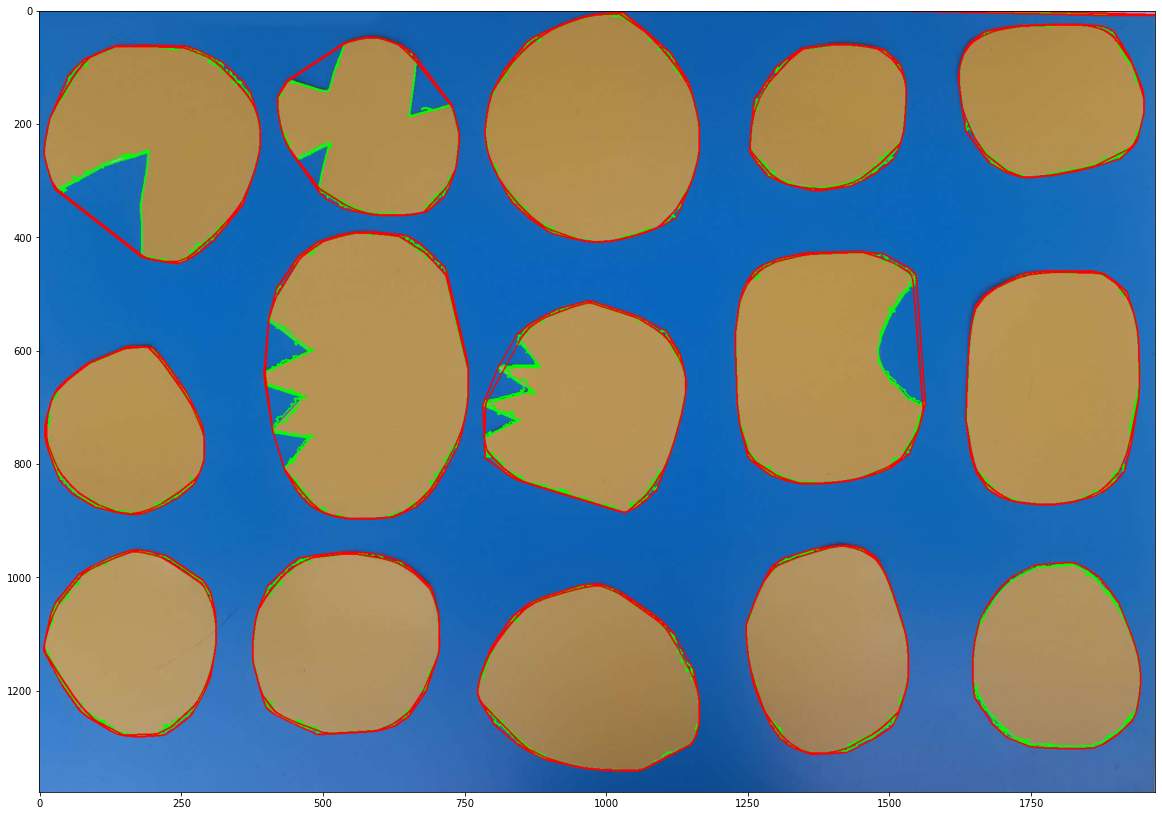

In [14]:
plt.figure(figsize = (20,40))
plt.imshow(np.array(potata_img))

In [15]:
cv2.contourArea(hulls[0])

97440.5

0.9812193081932051
0.9906663830239856
0.029856652327644527
0.9792705744524759
0.9921627136235508
0.9767582980444868
0.9876055720083361
0.9809138127312399
0.9920911839962782
0.9806539013047921
0.9903315947893432
0.927089016974038
0.9305058261067534
0.9870703133851487
0.9924056483856802
0.89835841596456
0.9033738468171941
0.933660620998205
0.9317314332241962
0.8531761724156526
0.853877131112975
0.971312109798256
0.9851338315768596
0.8700394278680648
0.871992580457358
0.9817189853833312
0.9879204218398773
0.9863035045676043
0.9906889889423658
0.31890179514255546


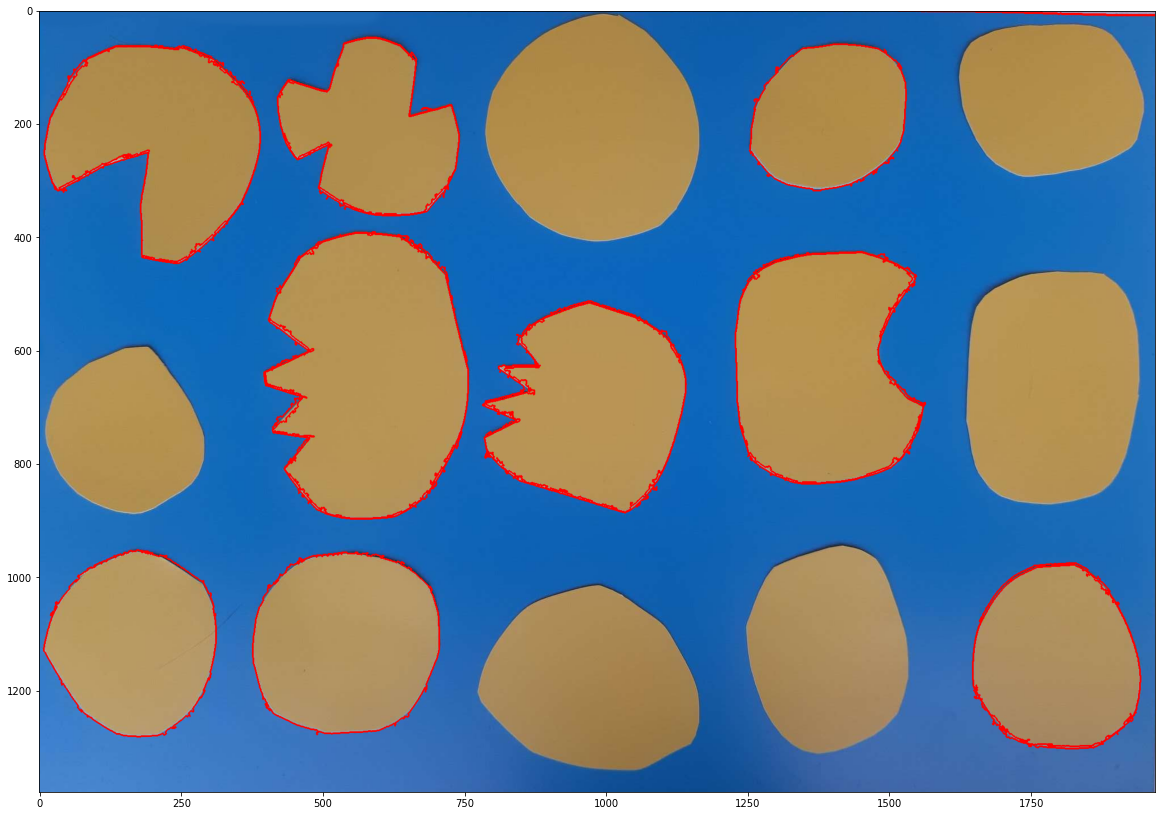

In [16]:
eps = 0.02
L = len(hulls)
for j in range(L):
    ar_cont = cv2.contourArea(contours[j])
    ar_hull = cv2.contourArea(hulls[j])
    print(ar_cont/ar_hull)
    if ar_cont/ar_hull < 1 - eps:
        cv2.drawContours(img, contours[j], -1, (255,0,0), 2)

plt.figure(figsize = (20,40))
plt.imshow(np.array(img))